## REPORT

## 1.
For 1st data blobs,      4 centers = [[3, 3], [-3, -3], [3, -3], [-3, 3]]
                         not close to one anoither
X, y = make_blobs(n_samples=12000, centers=centers, cluster_std=1.5, n_features=2, random_state=42)

Results of various models:

    1) K-means:  
    Comparing k-means clusters against the data:
            col_0     0     1     2     3
            row_0                        
            0        70  2933    89  2928
            1      2930    67  2911    72
            
#    K-means clustering model only identifies 2 clusters,
#      each of which is assigned mostly to two categories

    (2) mean-shift clustering:
    Comparing the assigned categories to the ones in the data:
            col_0    0    1    2    3
            row_0                    
            0        8    1    3  283
            1        4  284    6    0
            2        0   10  284    9
            3      299    3    0    6
    
#     Mean-shift clustering model is very good at identifying 4 clusters,
#      each of which is assigned mostly to one category

    (3) Spectral clustering:
            Comparing the assigned categories to the ones in the data:
        col_0    0    1    2    3
        row_0                    
        0        1    9    3  282
        1      283    6    5    0
        2       10    0  284    9
        3        3  301    0    4

#     Spectral clustering model is ok,

    (4) Affinity propagation
    
        Estimated number of clusters: 65
        
        
        
## 2
For 2nd data blobs,      4 centers = [[3, 3], [-3, -3], [3, -3], [-3, 3]]
                         very close to one anotherrelative to cluster standard deviation.
X, y = make_blobs(n_samples=12000, centers=centers, cluster_std=2.5, n_features=2, random_state=27)

Results of various models:

    1) K-means:  
    Comparing k-means clusters against the data
            col_0     0     1     2     3
            row_0                        
            0      2632   367   308  2697
            1       368  2633  2692   303

#    K-means clustering model can identify data as 2 clusters. 
#       each of which is assigned more to two categories, less to other two.
#       The model does not work well.

    (2) mean-shift clustering:
    Comparing the assigned categories to the ones in the data:  
            col_0    0
            row_0     
            0      303
            1      285
            2      281
            3      331
            
    
#     Mean-shift clustering model can identify data as 4 cluster, which all
#         are assigned to one category.
#         The model does not work well.

    (3) Spectral clustering:
            Comparing the assigned categories to the ones in the data:
        col_0    0    1    2    3
        row_0                    
            0      210  0   80   13
            1        8  0   38  239
            2      185  0    7   89
            3        9  3  286   33
          

#     Spectral clustering model can identify data as 4 clusters, each of which
#         is mostly assigned to two categories.
#         The model does not work well

    (4) Affinity propagation
    
        Estimated number of clusters: 41
        
        
## 3
For 2nd data blobs,      2 centers = [[4, 4], [4, -4]
                         very close to one another
X, y = make_blobs(n_samples=12000, centers=centers, cluster_std=3.5, n_features=2, random_state=27)

Results of various models:

    1) K-means:  
    Comparing k-means clusters against the data
            col_0     0     1
            row_0                        
            0       760  5252
            1      5240   748       

#    K-means clustering model can identify data as 2 clusters, each of which
#       is assigned to two categories
#       The model does not work well

    (2) mean-shift clustering:
    Comparing the assigned categories to the ones in the data:  
            col_0    0
            row_0     
            0      588
            1      612    
            
    
#     Mean-shift clustering model can identify data as two clusters of one    
#         category
#         The model does not work well


    (3) Spectral clustering:
            Comparing the assigned categories to the ones in the data:
        col_0    0    1   
        row_0                    
            0      586  2
            1      610  2
                     

#     Spectral clustering model can identify data as 2 clusters, each of which 
#          is mostly assigned to the same one category
#          The model does not work well

    (4) Affinity propagation
    
        Estimated number of clusters: 80
        
        
                


In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

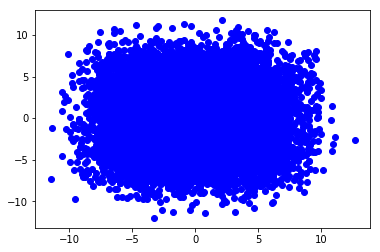

In [11]:
# create blobs of data
# The coordinates of the centers of our blobs.
centers = [[3, 3], [-3, -3], [3, -3], [-3, 3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=12000,
    centers=centers,
    cluster_std=2.5,
    n_features=2,
    random_state=27)

plt.scatter(X[:, 0], X[:, 1], c='blue')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## K-means clustering
>

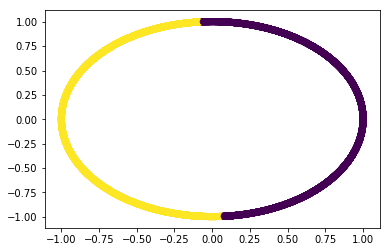

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0      2632   367   308  2697
1       368  2633  2692   303


In [12]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

## MeanShift clustering
>

In [13]:
# meanshift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 1


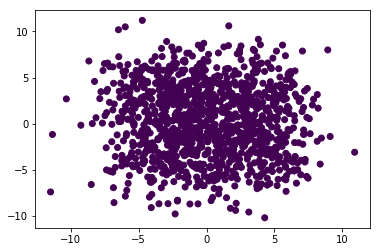

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      303
1      285
2      281
3      331


In [14]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

## Spectral clustering
>

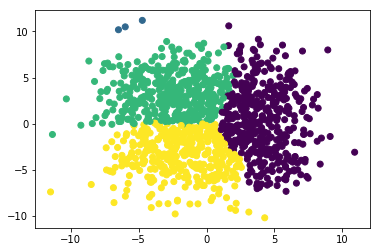

Comparing the assigned categories to the ones in the data:
col_0    0  1    2    3
row_0                  
0      210  0   80   13
1        8  0   38  239
2      185  0    7   89
3        9  3  286   33


In [15]:
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

## Affinity propagation
>

In [16]:
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 41


## 3rd blob data

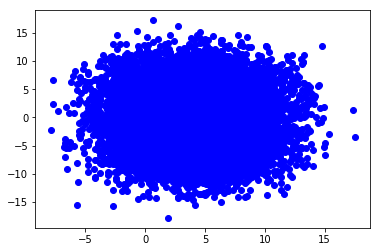

In [17]:
# create blobs of data
# The coordinates of the centers of our blobs.
centers = [[4, 4], [4, -4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=12000,
    centers=centers,
    cluster_std=3.5,
    n_features=2,
    random_state=27)

plt.scatter(X[:, 0], X[:, 1], c='blue')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

# k-means clustering
>

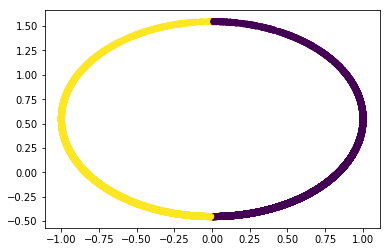

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0       760  5252
1      5240   748


In [18]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

## mean-shift clustering

In [19]:
# meanshift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 1


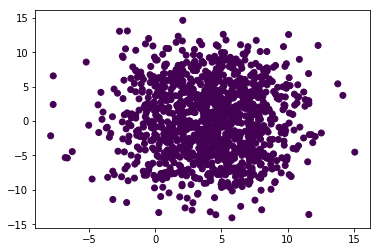

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      588
1      612


In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

## spectral clustering

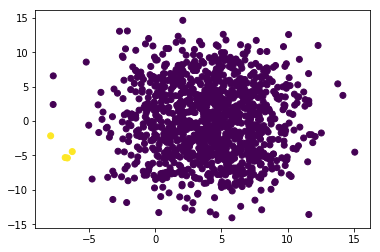

Comparing the assigned categories to the ones in the data:
col_0    0  1
row_0        
0      586  2
1      610  2


In [21]:
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

##  Affinity propagation

In [22]:
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 80
